In [1]:
# Ashraf Dasa (AYDASA@UAB.EDU)

<module 'streamlit' from 'C:\\Users\\xu7719\\AppData\\Roaming\\Python\\Python311\\site-packages\\streamlit\\__init__.py'>

In [125]:
import os
import time
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from itertools import product
import warnings
from sklearn import datasets
from sklearn import metrics
import json
import pickle
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")

In [159]:
df_resultsSummary = pd.DataFrame([])
def calculateAcc(y_test,y_predict,dataSetName,alg,info,numberOfParameters,executionTime): 
    #conf_matrix = confusion_matrix(y_test, y_predict )  
    acc  = accuracy_score(y_test, y_predict) 
    result = {"dataSetName": dataSetName,
              "alg":alg,
              "Training Time (s)":round(executionTime,2),
              "modelAccurecy (%)": round(100 * acc), 
              "info":info} 
    with open("./models/"+dataSetName +"_"+ alg+".json", "w") as outfile: 
        json.dump(result, outfile)
    
    print(dataSetName, alg, acc)
     
    return; 


In [160]:
def modelingPipeline(dataSetName,X_train,y_train,X_test,y_test):
    # LogisticRegression
    alg = "Logistic Regression" 
    ovr = LogisticRegression(random_state=15, multi_class='ovr', solver='lbfgs')
    startTime = time.time()
    ovr.fit(X_train, y_train)
    executionTime = time.time()-startTime
    y_predict =ovr.predict(X_test) 
    info = {"solver":"lbfgs"}
    calculateAcc(y_test,y_predict,dataSetName, alg,info,0, executionTime)
    pickle.dump(ovr, open("models/" + dataSetName + "_" + alg + ".h5", 'wb'))
    
    # Neural Network Classifier 
    alg = "Neural Network Classifier" 
    mlp_clf = MLPClassifier(hidden_layer_sizes=(16,12,8), max_iter = 1000, activation = 'logistic', solver = 'adam')
    startTime = time.time()
    mlp_clf.fit(X_train, y_train)
    executionTime = time.time()-startTime 
    y_predict =mlp_clf.predict(X_test)   
    info = { "activation" : 'logistic', "solver" : 'adam'}
    calculateAcc(y_test,y_predict,dataSetName, alg,info,0, executionTime)
    pickle.dump(ovr, open("models/" + dataSetName + "_" + alg + ".h5", 'wb'))
    

    # Gaussian Naive Bayes
    alg = "Naive Bayes"
    gnb = GaussianNB()
    startTime = time.time()
    gnb.fit(X_train, y_train)
    executionTime = time.time()-startTime 
    y_predict =gnb.predict(X_test) 
    calculateAcc(y_test,y_predict,dataSetName, alg,info,0, executionTime)
    pickle.dump(ovr, open("models/" + dataSetName + "_" + alg + ".h5", 'wb'))

    # Decision Tree
    alg = "Decision Tree"
    clf = tree.DecisionTreeClassifier()
    startTime = time.time()
    clf.fit(X_train, y_train)
    executionTime = time.time()-startTime 
    y_predict =clf.predict(X_test) 
    calculateAcc(y_test,y_predict,dataSetName, alg,info,0, executionTime)
    pickle.dump(ovr, open("models/" + dataSetName + "_" + alg + ".h5", 'wb'))


In [161]:
dataSetName = "IRIS"
iris = datasets.load_iris()  
X = iris.data
scaler = StandardScaler() 
scaler.fit(X)  
pickle.dump(scaler, open( "models/scaling_" + dataSetName + ".pkl" , 'wb'))
X = scaler.transform(X)
y = iris.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
modelingPipeline( dataSetName, X_train,y_train,X_test,y_test)

IRIS Logistic Regression 0.9666666666666667
IRIS Neural Network Classifier 0.9666666666666667
IRIS Naive Bayes 1.0
IRIS Decision Tree 1.0


In [162]:
dataSetName = "Digits"
digits = load_digits()
X = digits.data
scaler = StandardScaler() 
scaler.fit(X)   
pickle.dump(scaler, open( "models/scaling_" + dataSetName + ".pkl" , 'wb'))
X = scaler.transform(X)
y = digits.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
modelingPipeline( dataSetName, X_train,y_train,X_test,y_test)

Digits Logistic Regression 0.9666666666666667
Digits Neural Network Classifier 0.9111111111111111
Digits Naive Bayes 0.7666666666666667
Digits Decision Tree 0.8638888888888889


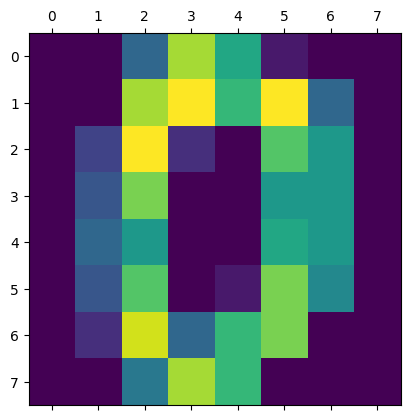

In [105]:
plt.matshow(digits.images[0])

In [113]:
digits.images[0].flatten()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [137]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [138]:
type(X_test[0] )

numpy.ndarray

In [143]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [141]:
dataSetName = "IRIS"
iris = datasets.load_iris()  
X = iris.data

In [142]:
X.shape

(150, 4)

In [151]:
print(X[:,3].max())
print(X[:,3].min())

2.5
0.1


In [144]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [287]:
# normalizing features 
scaler = StandardScaler() 
scaler.fit(features_raw) 
print("the max values in features before scaling : ",features_raw.max().max()) 
print("the min values in features before scaling : ",features_raw.min().min()) 
features = scaler.transform(features_raw) # transform the features to StandardScaler()

the max values in features before scaling :  255.0
the min values in features before scaling :  0.0


In [288]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=42) 

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape) 
print("y_test: ", y_test.shape) 

X_train:  (56000, 784)
X_test:  (14000, 784)
y_train:  (56000,)
y_test:  (14000,)


Our dataset originally had 784 features (columns). We aimed to reduce this number using Principal Component Analysis (PCA) while retaining most of the information. We started by keeping the top 50 principal components, which captured 43% of the variance in the data.

In [289]:
# Apply PCA
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print(X_train.shape, X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test.shape, X_test_pca.shape)

print(pca.noise_variance_)

(56000, 784) (56000, 50)
(14000, 784) (14000, 50)
0.4373978939213167


In [290]:
#  Explore the variance explained by the selected number
#  of components and adjust if necessary to retain at least
# 95% of the variance.
n_componentsExplore = []
for n_components in range(5,784,25): 
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    noise_variance = pca.noise_variance_
    n_componentsExplore.append([n_components,noise_variance]) 
    if(noise_variance < 0.05):
        break

In [291]:
n_componentsExplore

[[5, 0.7461170433292454],
 [30, 0.5208512615736208],
 [55, 0.4206365826195105],
 [80, 0.35148862085679317],
 [105, 0.29616477290608867],
 [130, 0.2518414187031177],
 [155, 0.21298846723225007],
 [180, 0.1804277796982072],
 [205, 0.15407449695463218],
 [230, 0.13215853799050223],
 [255, 0.11467577530595356],
 [280, 0.10024391623636372],
 [305, 0.08809805927432372],
 [330, 0.07777820168987501],
 [355, 0.06912136440487493],
 [380, 0.06167311242764846],
 [405, 0.055253201130123566],
 [430, 0.04947378672653263]]

To find the optimal number of components for our analysis, the below loop that iteratively increased the number of components by 25, all the way up to 784. The loop stopped when the explained variance reached 95%. This process is visualized in a scree plot, which helps us see how adding more components contributes to the explained variance.

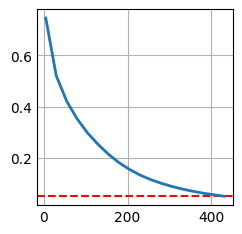

In [292]:
# Scree plot to find the elbo at 0.05
n_componentsExploreArr = np.zeros([len(n_componentsExplore),2])
for i in n_componentsExplore: 
    n_componentsExploreArr = np.append(n_componentsExploreArr,[i] , axis=0)
    
plt.style.use('_mpl-gallery') 
x = np.matrix(n_componentsExplore)[:,0]
y = np.matrix(n_componentsExplore)[:,1] 
fig, ax = plt.subplots()
plt.axhline(y = 0.05, color = 'r', linestyle = 'dashed')    
ax.plot(x, y, linewidth=2.0) 
plt.show()
 

an alternative method provided by scikit-learn. This method allows us to specify the desired explained variance, and scikit-learn will find the closest number of components that achieves that level of variance.

In [293]:
# alternative method: 
pca = PCA(n_components= 0.95, svd_solver='full')
pca.fit(X_train)
print(pca.noise_variance_)
print(len(pca.components_))

0.07801665582474857
327


In [294]:
# For this particular task, I chose to use 400 components 
n_components = 400
pca = PCA(n_components= n_components)
pca.fit(X_train)

# transforming x train and x test
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train.shape, X_train_pca.shape)
print(X_test.shape, X_test_pca.shape)
print(pca.noise_variance_)

(56000, 784) (56000, 400)
(14000, 784) (14000, 400)
0.05645825103308629


In [297]:
df_resultsSummary = pd.DataFrame([])
def calculateAcc(y_test,y_predict,methodName1,methodNam2,executionTime,df_resultsSummary, printResults = True): 
    conf_matrix = confusion_matrix(y_test, y_predict ) 
    if(printResults):
        print(conf_matrix) 
        print(classification_report(y_test, y_predict ))
    acc_ovr = accuracy_score(y_test, y_predict)
    return pd.concat([df_resultsSummary,pd.DataFrame([[methodName1,methodNam2,acc_ovr,executionTime]]
                                                     ,columns=["Model","Data","accuracy","executionTime"])])

In [296]:
# Implement a Logistic Regression classifier.
ovr = LogisticRegression(random_state=15, multi_class='ovr', solver='lbfgs')
# Train One-Vs-Rest Logistic Regression
startTime = time.time()
ovr.fit(X_train, y_train)
executionTime = time.time()-startTime
# predict lbfgs PCA
y_predict =ovr.predict(X_test)  
df_resultsSummary = calculateAcc(y_test,y_predict,
                                 "Logistic Regression",
                                 "all Features - no PCA", executionTime,
                                 df_resultsSummary)

[[1305    1    5    0    1    6   14    2    8    1]
 [   0 1557    5    8    2   10    1    3   13    1]
 [   8   16 1233   23   16   13   18   15   31    7]
 [   7   11   34 1269    1   38    7   18   25   23]
 [   4    2    9    6 1200    3    7    7   13   44]
 [   8   10    7   50   14 1112   21    7   34   10]
 [   4    5   16    1   11   23 1330    0    6    0]
 [   6    4   21    3   14    7    0 1409    5   34]
 [  14   37   17   44    9   45   14   10 1138   29]
 [   8    9    6   23   46    9    0   52   11 1256]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94   

In [298]:
ovr = LogisticRegression(random_state=15, multi_class='ovr', solver='lbfgs')
# Train One-Vs-Rest Logistic Regression
startTime = time.time()
ovr.fit(X_train_pca, y_train)
executionTime = time.time()-startTime
# predict lbfgs PCA
y_predict =ovr.predict(X_test_pca)   
df_resultsSummary = calculateAcc(y_test,y_predict,
                                 "Logistic Regression",
                                 "PCA (400 components)",
                                 executionTime,
                                 df_resultsSummary)

[[1304    1    4    1    2    8   11    2    8    2]
 [   0 1557    4    9    2    9    3    4   11    1]
 [   6   18 1239   17   15   10   19   15   34    7]
 [   8    9   37 1268    2   41    6   19   25   18]
 [   3    2    8    7 1201    3    6    8   12   45]
 [   7    8    6   50   16 1113   23    5   35   10]
 [   6    4   16    1   10   19 1335    0    5    0]
 [   5    4   21    0   11    7    0 1421    2   32]
 [  10   36   15   40    9   44   12   12 1154   25]
 [  10   10    6   22   45    9    0   52   13 1253]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.90      0.91      1380
           3       0.90      0.88      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.94      0.96      0.95      1396
           7       0.92      0.95   

In [299]:
# Part IV: Neural Network Classifier 
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,12,8), max_iter = 1000, activation = 'logistic', solver = 'adam')
startTime = time.time()
mlp_clf.fit(X_train, y_train)
executionTime = time.time()-startTime 
y_predict =mlp_clf.predict(X_test)   
df_resultsSummary = calculateAcc(y_test,y_predict,
                                 "NN Classifier, 3 layers, logistic",
                                "All Features - no PCA",
                                 executionTime,
                                 df_resultsSummary)

[[1252    0   11    1    9   19   29    2   11    9]
 [   0 1531   11   12    1    8    1    7   28    1]
 [  27   28 1224   34   10    3   15   13   23    3]
 [   7   14   30 1268    2   46    3   25   18   20]
 [   8    1    9    0 1183    7   22   14   11   40]
 [   6    7    8   54    7 1096   10   10   52   23]
 [  16    4   20    0   22   15 1302    3   13    1]
 [   3   12   17   23   18   17    2 1348    2   61]
 [  13   24   33   28    4   61   16    8 1144   26]
 [  13    2    3   10   62   16    3   61   13 1237]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1343
           1       0.94      0.96      0.95      1600
           2       0.90      0.89      0.89      1380
           3       0.89      0.88      0.89      1433
           4       0.90      0.91      0.91      1295
           5       0.85      0.86      0.86      1273
           6       0.93      0.93      0.93      1396
           7       0.90      0.90   

In [300]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,12,8), max_iter = 1000, activation = 'logistic', solver = 'adam')
startTime = time.time()
mlp_clf.fit(X_train_pca, y_train)
executionTime = time.time()-startTime 
y_predict = mlp_clf.predict(X_test_pca)   
df_resultsSummary = calculateAcc(y_test,y_predict,
                                 "NN Classifier, 3 layers, logistic",
                                 "PCA (400 components)",
                                 executionTime,
                                 df_resultsSummary)

[[1252    2   15    1    0   29   32    3    9    0]
 [   1 1548    8   10    2    3    1   10   13    4]
 [  27   14 1229   25   10    9   12   17   31    6]
 [   0    5   31 1275    2   57    0   23   26   14]
 [   2    5    3    1 1186   11   20    6    7   54]
 [   8    4    3   59    7 1122   12    6   43    9]
 [  31    3   13    0   22   14 1304    0    7    2]
 [   8   12   11   31    7    8    1 1376    2   47]
 [   8   21   18   28    6   34   20    5 1201   16]
 [   4    4    6   12   55   16    3   34   11 1275]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1343
           1       0.96      0.97      0.96      1600
           2       0.92      0.89      0.90      1380
           3       0.88      0.89      0.89      1433
           4       0.91      0.92      0.92      1295
           5       0.86      0.88      0.87      1273
           6       0.93      0.93      0.93      1396
           7       0.93      0.92   

### hyperparameters 

In [304]:
# Define the grid search space
optimizers = ['adam', 'sgd','lbfgs']
activations = ['logistic','relu', 'tanh']  
learning_rate = ['constant', 'adaptive']
dataSource = ['All Features - no PCA','PCA (400 components)']

options = [] # define empty list 
for optimizer, activation,learning_rate,dataSource in product(optimizers, activations,learning_rate,dataSource):
  options.append([optimizer,activation,learning_rate,dataSource]) # add all possible options 

searchingOptions = np.random.choice(len(options),10, replace=False) # randomly pick 10 options 
print("All Options", options) 
for i in searchingOptions:
  print(options[i])

All Options [['adam', 'logistic', 'constant', 'All Features - no PCA'], ['adam', 'logistic', 'constant', 'PCA (400 components)'], ['adam', 'logistic', 'adaptive', 'All Features - no PCA'], ['adam', 'logistic', 'adaptive', 'PCA (400 components)'], ['adam', 'relu', 'constant', 'All Features - no PCA'], ['adam', 'relu', 'constant', 'PCA (400 components)'], ['adam', 'relu', 'adaptive', 'All Features - no PCA'], ['adam', 'relu', 'adaptive', 'PCA (400 components)'], ['adam', 'tanh', 'constant', 'All Features - no PCA'], ['adam', 'tanh', 'constant', 'PCA (400 components)'], ['adam', 'tanh', 'adaptive', 'All Features - no PCA'], ['adam', 'tanh', 'adaptive', 'PCA (400 components)'], ['sgd', 'logistic', 'constant', 'All Features - no PCA'], ['sgd', 'logistic', 'constant', 'PCA (400 components)'], ['sgd', 'logistic', 'adaptive', 'All Features - no PCA'], ['sgd', 'logistic', 'adaptive', 'PCA (400 components)'], ['sgd', 'relu', 'constant', 'All Features - no PCA'], ['sgd', 'relu', 'constant', 'PCA 

In [311]:
for i in searchingOptions: 
    activation = options[i][1] 
    solver = options[i][0] 
    learning_rate = options[i][2]
    dataSource = options[i][3] 
    if(dataSource == "All Features - no PCA"):
        trainingData = X_train
        testingData = X_test
    else:
        trainingData = X_train_pca
        testingData = X_test_pca
    mlp_clf = MLPClassifier(hidden_layer_sizes=(16,12,8), max_iter = 500,
                             activation = activation, solver = solver,learning_rate=learning_rate)
    startTime = time.time()
    mlp_clf.fit(trainingData, y_train)
    executionTime = time.time()-startTime 
    y_predict = mlp_clf.predict(testingData)   
    df_resultsSummary = calculateAcc(y_test,y_predict,
                                    "hyperparameters activation" + activation + " solver:" + solver + " learning_rate" + learning_rate,
                                    dataSource,
                                    executionTime,
                                    df_resultsSummary,printResults=False)
    print(options[i]," accuracy:",df_resultsSummary.tail(1)["accuracy"].values[0])

['sgd', 'tanh', 'adaptive', 'All Features - no PCA']  accuracy: 0.9167857142857143
['sgd', 'relu', 'constant', 'PCA (400 components)']  accuracy: 0.9393571428571429
['sgd', 'tanh', 'constant', 'PCA (400 components)']  accuracy: 0.927
['lbfgs', 'logistic', 'constant', 'PCA (400 components)']  accuracy: 0.9050714285714285
['lbfgs', 'relu', 'adaptive', 'PCA (400 components)']  accuracy: 0.9363571428571429
['adam', 'relu', 'constant', 'PCA (400 components)']  accuracy: 0.9352857142857143
['lbfgs', 'logistic', 'constant', 'All Features - no PCA']  accuracy: 0.9005
['adam', 'relu', 'adaptive', 'PCA (400 components)']  accuracy: 0.9388571428571428
['adam', 'tanh', 'constant', 'All Features - no PCA']  accuracy: 0.9128571428571428
['sgd', 'tanh', 'constant', 'All Features - no PCA']  accuracy: 0.9152142857142858


In [313]:
df_resultsSummary

,Model,Data,accuracy,executionTime
0,Logistic Regression,PCA (400 components),0.917500,25.284516
0,"NN Classifier, 3 layers, logistic",All Features - no PCA,0.898929,317.773614
0,"NN Classifier, 3 layers, logistic",PCA (400 components),0.912000,185.229174
0,hyperparameters activationtanh solver:sgd lear...,All Features - no PCA,0.916786,357.610471
0,hyperparameters activationrelu solver:sgd lear...,PCA (400 components),0.939357,228.033520
0,hyperparameters activationtanh solver:sgd lear...,PCA (400 components),0.927000,216.902335
0,hyperparameters activationlogistic solver:lbfg...,PCA (400 components),0.905071,120.471338
0,hyperparameters activationrelu solver:lbfgs le...,PCA (400 components),0.936357,79.072497
0,hyperparameters activationrelu solver:adam lea...,PCA (400 components),0.935286,109.893801
0,hyperparameters activationlogistic solver:lbfg...,All Features - no PCA,0.900500,192.081178
